# Named Entity Recognition with Transformers using Python, PyTorch, and Huggingface

Named Entity Recognition (NER) is a subtask of information extraction that classifies named entities into predefined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

## 1. Introduction to Transformers

Transformers are a type of deep learning model that have gained immense popularity in recent years due to their effectiveness in various NLP tasks. They are based on the attention mechanism, which allows the model to focus on different parts of the input text when producing an output.

## 2. Setting up the Environment

Before diving into the code, let's set up our environment. We'll be using Google Colab, which provides a free GPU for faster computations.


In [1]:
# Install necessary packages
!pip install transformers
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.8 MB/s eta 0:00:00


After installing, let's check the versions for reproducibility:


In [2]:
import transformers
import torch

print("Transformers version:", transformers.__version__)
print("PyTorch version:", torch.__version__)

Transformers version: 4.33.2
PyTorch version: 2.0.1+cu118


## 3. Loading Pre-trained Models

Huggingface's \`transformers\` library provides a plethora of pre-trained models. For NER, the \`BertForTokenClassification\` is commonly used.


In [3]:
from transformers import BertTokenizer, BertForTokenClassification
from transformers import pipeline

# Load pre-trained model and tokenizer
model = BertForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")

# NER pipeline
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 4. Named Entity Recognition

With our model loaded, we can now use it to recognize entities in a given text.


In [4]:
text = "Elon Musk is the CEO of SpaceX."
ner_results = nlp_ner(text)
for entity in ner_results:
    print(entity)

{'entity': 'I-PER', 'score': 0.99957377, 'index': 1, 'word': 'El', 'start': None, 'end': None}
{'entity': 'I-PER', 'score': 0.9990213, 'index': 2, 'word': '##on', 'start': None, 'end': None}
{'entity': 'I-PER', 'score': 0.99931026, 'index': 3, 'word': 'Mu', 'start': None, 'end': None}
{'entity': 'I-PER', 'score': 0.99866676, 'index': 4, 'word': '##sk', 'start': None, 'end': None}
{'entity': 'I-ORG', 'score': 0.99927765, 'index': 9, 'word': 'Space', 'start': None, 'end': None}
{'entity': 'I-ORG', 'score': 0.99880457, 'index': 10, 'word': '##X', 'start': None, 'end': None}


## 5. Understanding the Output

The output will be a list of dictionaries. Each dictionary represents an entity and contains:

- \`word\`: The actual word or token.
- \`score\`: Confidence score.
- \`entity\`: The entity type (e.g., \`B-PER\` for beginning of a person's name).

## 6. Visualizing the Results

For a more engaging tutorial, let's visualize the NER results:


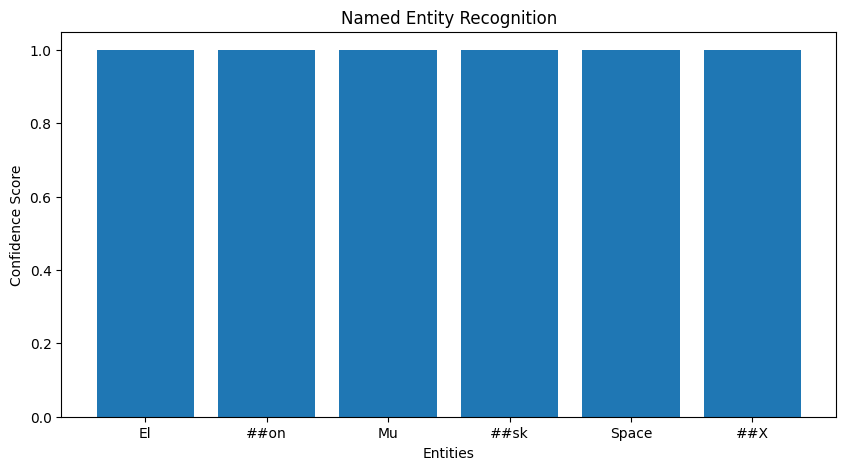

In [5]:
import matplotlib.pyplot as plt

words = [entity['word'] for entity in ner_results]
scores = [entity['score'] for entity in ner_results]

plt.figure(figsize=(10,5))
plt.bar(words, scores)
plt.xlabel('Entities')
plt.ylabel('Confidence Score')
plt.title('Named Entity Recognition')
plt.show()

## 7. Conclusion

Named Entity Recognition is a powerful tool in the NLP toolkit. With the advent of transformer models and the ease of use provided by the Huggingface library, implementing NER has never been easier. This tutorial provided a brief overview of how to use transformers for NER. For more in-depth knowledge, diving into the official documentation and research papers is recommended.

## 8. Reproducibility

For reproducibility, always ensure:

1. Same package versions are used.
2. Set random seeds for PyTorch and any other libraries.
3. Use the same model weights and architecture.